<a href="https://colab.research.google.com/github/Amit230124/placement_predictor_model/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import numpy as np
import pandas as pd

In [272]:
df=pd.read_csv("/content/placement.csv")
print(df.head())

   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0


In [273]:
df=df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Analysis of data

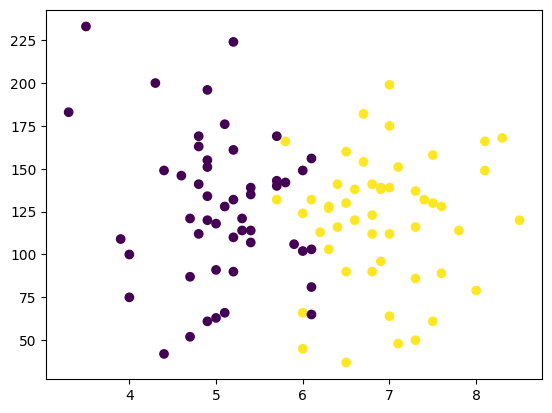

In [274]:
import matplotlib.pyplot as plt
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])
# yellow=placement
# purple=no placement

sepration of independent and dependent varriable

In [275]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [276]:
print(x)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]


In [277]:
print(y)

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


train test split

In [278]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.1)

In [279]:
X_train

,cgpa,iq
27,6.0,124.0
60,6.9,139.0
23,4.7,87.0
56,6.1,65.0
32,7.0,139.0
...,...,...
75,4.8,169.0
71,6.1,132.0
72,7.3,116.0
24,4.7,121.0


In [280]:
X_test

,cgpa,iq
41,5.4,114.0
26,7.0,199.0
50,3.5,233.0
51,4.8,141.0
68,4.0,75.0
7,5.0,63.0
67,5.0,118.0
97,6.7,182.0
21,7.1,151.0
95,4.3,200.0


In [281]:
Y_train

,placement
27,1
60,1
23,0
56,0
32,1
...,...
75,0
71,1
72,1
24,0


In [282]:
Y_test

,placement
41,0
26,1
50,0
51,0
68,0
7,0
67,0
97,1
21,1
95,0


convert values between -1 to 1

In [283]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-6.34881644e-02,  8.34884678e-02],
       [ 7.52788235e-01,  4.88918078e-01],
       [-1.24255407e+00, -9.16571237e-01],
       [ 2.72092133e-02, -1.51120133e+00],
       [ 8.43485612e-01,  4.88918078e-01],
       [-6.07672430e-01, -3.75998424e-01],
       [-7.89067186e-01,  2.78635253e+00],
       [ 2.08603969e-01,  1.64574390e-01],
       [-6.34881644e-02, -2.05177414e+00],
       [-6.98369808e-01, -1.86797939e-01],
       [-6.34881644e-02,  7.59204485e-01],
       [-1.06115932e+00,  9.21376329e-01],
       [ 1.29697250e+00,  2.45660312e-01],
       [ 2.99301346e-01, -1.32740657e-01],
       [ 1.84115677e+00,  1.21869138e+00],
       [ 1.29697250e+00, -1.61931589e+00],
       [ 1.84115677e+00,  7.59204485e-01],
       [-2.44882920e-01,  5.70004000e-01],
       [-1.87743572e+00, -5.65198908e-01],
       [ 7.52788235e-01,  4.61889437e-01],
       [ 6.62090857e-01,  5.64598272e-02],
       [ 1.29697250e+00,  1.00246225e+00],
       [-1.24255407e+00, -1.86257366e+00],
       [-6.

In [284]:
X_test=scaler.transform(X_test)
X_test

array([[-0.60767243, -0.18679794],
       [ 0.84348561,  2.11063652],
       [-2.33092261,  3.0296103 ],
       [-1.1518567 ,  0.54297536],
       [-1.87743572, -1.24091492],
       [-0.97046194, -1.56525861],
       [-0.97046194, -0.07868338],
       [ 0.57139348,  1.65114963],
       [ 0.93418299,  0.81326177],
       [-1.60534358,  2.13766516]])

In [285]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [286]:
# model training
clf.fit(X_train,Y_train)

LogisticRegression()

Evaluation of model

manual accuracy checking

In [287]:
clf.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [288]:
Y_test

,placement
41,0
26,1
50,0
51,0
68,0
7,0
67,0
97,1
21,1
95,0


technical way of checking

In [289]:
Y_pred=clf.predict(X_test)

In [290]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

1.0

<Axes: >

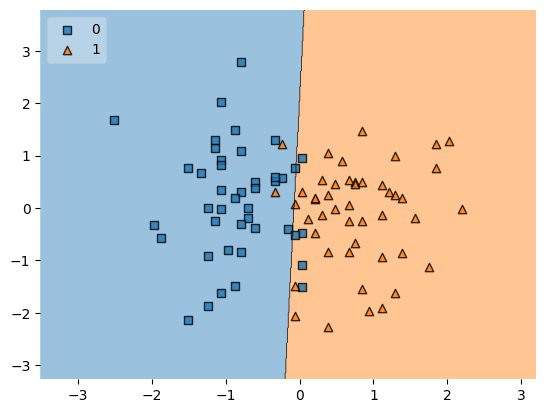

In [291]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

In [292]:
import pickle
pickle.dump(clf,open("model.pkl","wb"))